# DATA EXPLORATORY ANALYSIS AND HYPOTHESIS TESTING FOR INSURANCE CLAIMS DATA

### 1) Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view ofthe data. Use the same for the subsequent questions.

In [174]:
import pandas as pd 
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import datetime as dt

In [175]:
claims = pd.read_csv('Insurance CaseStudy/claims.csv')

In [176]:
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [177]:
customer = pd.read_csv('Insurance CaseStudy/cust_demographics.csv')

In [178]:
customer.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [179]:
cust_claim = claims.merge(customer, left_on=['customer_id'], right_on=['CUST_ID'], how='inner')

In [180]:
cust_claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


### 2) Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.


In [181]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  CUST_ID              1085 non-null   int64  
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

In [182]:
cust_claim.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

In [183]:
cust_claim = cust_claim.drop(columns='CUST_ID')
cust_claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,Female,22-Oct-64,LA,469-345-5617,Silver


In [184]:
cust_claim['DateOfBirth'] =  pd.to_datetime(cust_claim['DateOfBirth'], format='%d-%b-%y')

In [185]:
cust_claim['claim_date'] =  pd.to_datetime(cust_claim['claim_date'], format='%m/%d/%Y')

In [186]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   customer_id          1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1020 non-null   object        
 8   total_policy_claims  1075 non-null   float64       
 9   fraudulent           1085 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   datetime64[ns]
 12  State                1085 non-null   object        
 13  Contact              1085 non-nul

### 3) Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the dollar sign.

In [187]:
cust_claim.claim_amount = cust_claim.claim_amount.str.replace('$',' ').apply(pd.to_numeric)

C:\Users\Mahadev\AppData\Local\Temp\ipykernel_22088\38102555.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cust_claim.claim_amount = cust_claim.claim_amount.str.replace('$',' ').apply(pd.to_numeric)


In [188]:
cust_claim.claim_amount.dtypes

dtype('float64')

In [189]:
cust_claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,1996-07-07,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,2064-10-22,LA,469-345-5617,Silver


### 4) Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [190]:
cust_claim.police_report.value_counts()

No         621
Unknown    296
Yes        168
Name: police_report, dtype: int64

In [191]:
cust_claim['alert flag'] = np.where(cust_claim.police_report == 'Yes','1',(np.where(cust_claim.police_report == 'No','0',np.NaN)))

In [192]:
cust_claim.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,nan
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,0
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0


### 5) One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. 

### Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [193]:
(cust_claim.sort_values(by='claim_date')).groupby(['customer_id']).last()

,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert flag
customer_id,,,,,,,,,,,,,,,
154557,69348631,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,0
263204,40953049,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,Male,1972-12-20,TX,173-892-6314,Silver,0
287476,45780237,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,Male,1988-07-28,FL,364-598-1549,Silver,nan
441097,89833962,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,Male,1971-08-19,CA,187-348-8375,Gold,1
524545,35782742,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,Female,1980-08-10,NC,798-862-5398,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99674324,4549014,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1.0,No,Male,2065-01-28,UT,517-562-4916,Silver,0
99723844,35453672,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1.0,No,Female,2066-06-19,HI,457-752-1374,Gold,1
99761663,37305754,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1.0,Yes,Female,2063-11-18,NC,643-246-4718,Silver,0


### 6) Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [194]:
cust_claim.claim_amount = cust_claim.claim_amount.fillna(cust_claim.claim_amount.mean())
cust_claim.total_policy_claims = cust_claim.total_policy_claims.fillna(cust_claim.total_policy_claims.mean())

In [195]:
cust_claim.isna().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
alert flag             0
dtype: int64

### 7) Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria.
### Children < 18
### Youth 18-30
### Adult 30-60
### Senior > 60

In [196]:
cust_claim['Age']=((cust_claim.claim_date-cust_claim.DateOfBirth)/np.timedelta64(1,'Y')).round()
cust_claim['Category']=np.where(cust_claim.Age>60,'Senior',np.where(cust_claim.Age>30,'Adult',np.where(cust_claim.Age>18,'Youth','Children')))

In [197]:
cust_claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert flag,Age,Category
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0,39.0,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,nan,49.0,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,0,34.0,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,0,34.0,Adult
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0,32.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15,ND,459-425-4319,Platinum,1,37.0,Adult
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,1996-07-07,ID,529-462-1635,Silver,0,21.0,Youth
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11,WI,712-651-9613,Gold,1,27.0,Youth
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,2064-10-22,LA,469-345-5617,Silver,0,-48.0,Children


### 8) What is the average amount claimed by the customers from various segments?

In [198]:
cust_claim.groupby('Segment')[['claim_amount']].mean()

,claim_amount
Segment,
Gold,12829.631974
Platinum,12341.952267
Silver,12208.435570


### 9) What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [199]:
dt.datetime(2018,10,1)-dt.timedelta(days=20)

datetime.datetime(2018, 9, 11, 0, 0)

In [200]:
cust_claim.query('claim_date <= "2018-09-11"').claim_amount.sum()

12402276.019607846

### 10) How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [201]:
cust_claim.query('State in ["TX","DE","AK"] and Category == "Adult"').groupby('State')[['Category']].count()

,Category
State,
AK,9
DE,9
TX,11


### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

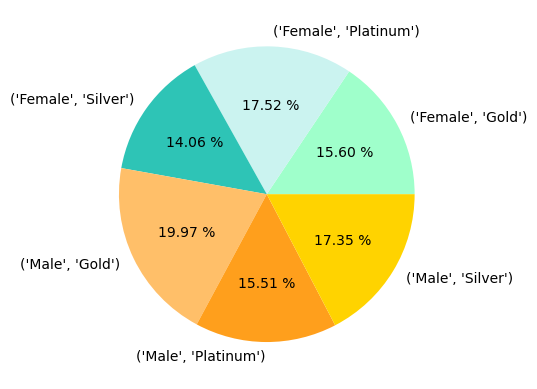

In [202]:
x = cust_claim.groupby(['gender','Segment'])[['claim_amount']].sum()
plt.pie(x.claim_amount,labels=x.index,autopct='%0.2f %%',colors = ['#9FFFCB','#CBF3F0','#2EC4B6','#FFBF69','#FF9F1C','#FFD300'])
plt.show()

### 12) Among males and females, which gender had claimed the most for any type of driver related issues? 
### E.g. This metric can be compared using a bar chart

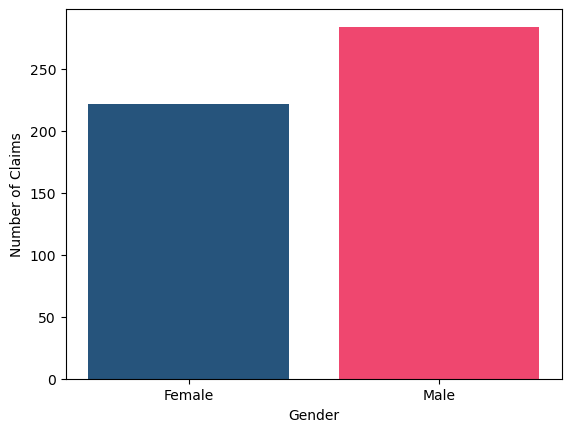

In [203]:
q = cust_claim.query("incident_cause in ['Driver error','Other driver error']").groupby('gender')[['incident_cause']].count()
plt.bar(q.index,q.incident_cause, color = ['#26547C','#EF476F'])
plt.xlabel('Gender')
plt.ylabel('Number of Claims')
plt.show()

### 13) Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

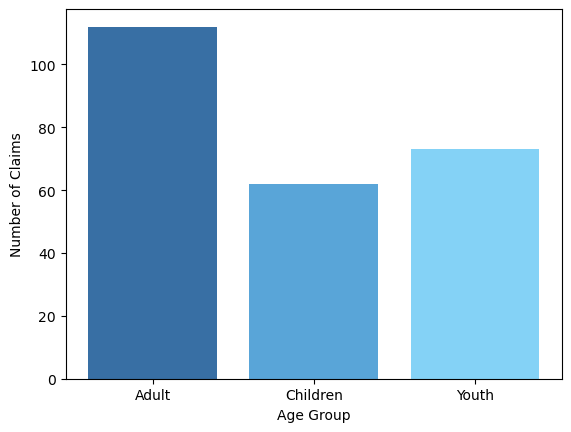

In [204]:
policy_claim = cust_claim.query('fraudulent=="Yes"').groupby('Category')[['fraudulent']].count()
plt.bar(policy_claim.index,policy_claim.fraudulent,color = ['#386FA4','#59A5D8','#84D2F6'])
plt.xlabel('Age Group')
plt.ylabel('Number of Claims')
plt.show()

### 14) Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

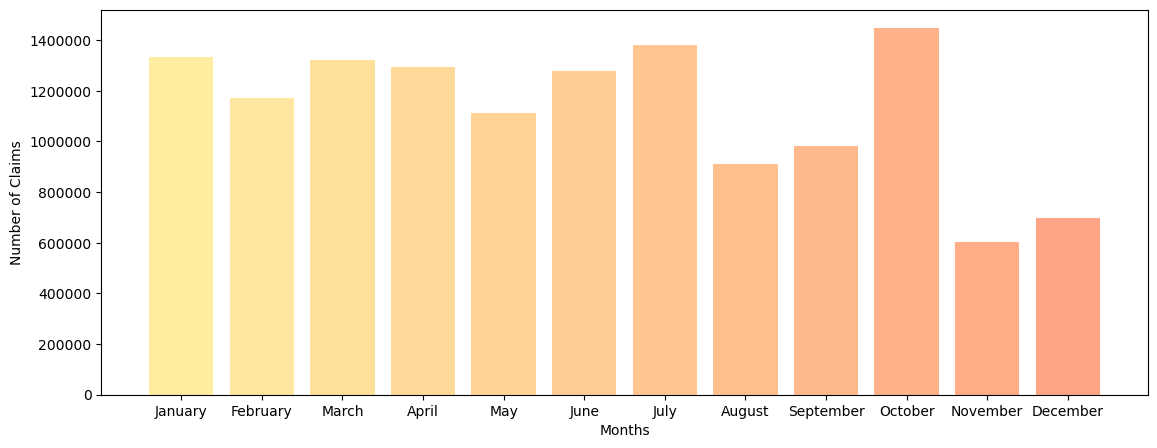

In [205]:
monthly_trend = cust_claim.groupby(cust_claim.claim_date.dt.month_name())[['claim_amount']].sum().T
monthly_trend = monthly_trend[['January','February','March','April','May','June','July','August','September','October','November','December']].T
plt.figure(figsize=(13.5,5))
plt.bar(monthly_trend.index,monthly_trend.claim_amount,color = ['#FFEDA0','#FFE69E','#FFE09B','#FFD999','#FFD396','#FFCC94','#FFC691','#FFBF8F','#FFB98C','#FFB28A','#FFAC87','#FFA585'])
plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('Months')
plt.ylabel('Number of Claims')
plt.show()

### 15) What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.
 

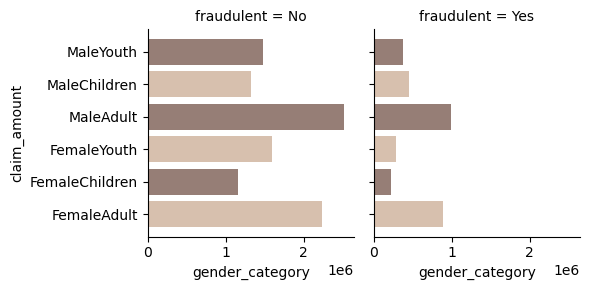

In [206]:
avg_claim=cust_claim.groupby(['fraudulent','gender','Category'])[['claim_amount']].sum().reset_index()
avg_claim['gender_category']=avg_claim.gender+avg_claim.Category
d=sns.FacetGrid(avg_claim,col='fraudulent')
d.map(plt.barh,'gender_category','claim_amount',color=['#D7C0AE','#967E76'])
plt.show()

## Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

### 16) Is there any similarity in the amount claimed by males and females?

In [207]:
claim_male = cust_claim['claim_amount'].loc[cust_claim['gender']=="Male"]
claim_female = cust_claim['claim_amount'].loc[cust_claim['gender']=="Female"]

In [208]:
claim_male.mean()

12853.058506136278

In [209]:
claim_female.mean()

12062.634706623674

In [210]:
stats.ttest_ind(claim_male,claim_female)

Ttest_indResult(statistic=0.9738138415066818, pvalue=0.33036643165116597)

p-value = 0.33036643165116597 which is greater than 0.05 , so, we cannot reject null hypothesis. With 95 percent confidence interval, we cannot say there is similarity in the amount claimed by males and females with the help of this data. 

### 17) Is there any relationship between age category and segment?

In [211]:
agecat = pd.crosstab(cust_claim.Category, cust_claim.Segment, margins = True)
agecat

Segment,Gold,Platinum,Silver,All
Category,,,,
Adult,178,155,158,491
Children,88,90,88,266
Youth,109,117,102,328
All,375,362,348,1085


In [212]:
k = stats.chi2_contingency(observed= agecat)
k

(1.9412879320612126,
 0.9923623576070913,
 9,
 array([[ 169.70046083,  163.81751152,  157.48202765,  491.        ],
        [  91.93548387,   88.7483871 ,   85.31612903,  266.        ],
        [ 113.3640553 ,  109.43410138,  105.20184332,  328.        ],
        [ 375.        ,  362.        ,  348.        , 1085.        ]]))

In [213]:
print("The chi square stat is {} and the p value is {}".format(k[0],k[1]))

The chi square stat is 1.9412879320612126 and the p value is 0.9923623576070913


Since the significance p value of the test is greter than 0.05, we fail reject the null hypothesis. Therefore there is no relationship between age category and segment.

### 18) The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [214]:
cust_claim.claim_amount.mean()

12467.681372549034

In [215]:
stats.ttest_1samp(cust_claim.claim_amount,10000)

Ttest_1sampResult(statistic=6.082468636028013, pvalue=1.6383633097209554e-09)

p-value = 1.6383633097209554e-09 which is greater than 0.05 , so, we cannot reject null hypothesis. With 95 percent confidence interval, we cannot say there is similarity in the amount claimed by males and females with the help of this data.

### 19) Is there any difference between age groups and insurance claims?

In [216]:
Adult_claim = cust_claim.query('Category=="Adult"').claim_amount
Youth_claim = cust_claim.query('Category=="Youth"').claim_amount
Children_claim = cust_claim.query('Category=="Children"').claim_amount

In [217]:
Adult_claim.mean()

13495.799269198522

In [218]:
Youth_claim.mean()

11365.593510879957

In [219]:
Children_claim.mean()

11928.880362671382

In [220]:
stats.f_oneway(Adult_claim,Youth_claim,Children_claim)

F_onewayResult(statistic=2.793891350280526, pvalue=0.06162412579133348)

pvalue=0.06162412579133348 which is greater than 0.05, so, we cannot reject null hypothesis. With 95 percent confidence interval, we cannot say there is difference between age groups and insurance claims with the help of this data.


### 20) Is there any relationship between total number of policy claims and the claimed amount?

In [221]:
stats.pearsonr(cust_claim.total_policy_claims,cust_claim.claim_amount)

PearsonRResult(statistic=-0.01744856239346895, pvalue=0.5658830110326771)